In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt


# Reddit 

In [13]:
#read reddit data
reddit = pd.read_csv('reddit.csv')
reddit

,title,sentiment,topic,Unnamed: 3
0,Elon Musk Leaves Presidential Councils,Neutral,Politics,NaN
1,Elon Musk's 18 year transformation after found...,Positive,Tesla,Personal Growth
2,Elon is woke.,Neutral,Social Commentary,NaN
3,"this is a dick move, change my mind",Negative,Criticism,NaN
4,Legend.,Positive,Personal,Admiration
...,...,...,...,...
190,Merry Christmas,Positive,Celebration,NaN
191,Elon Musk accepts Nicolas Maduro's fight chall...,Negative,Controversy,NaN
192,And that??s how you name someone,Neutral,Naming,NaN
193,Could be slightly faster,Neutral,Improvement,NaN


,title,topic,Unnamed: 3
sentiment,,,
Negative,21,21,0
Neutral,74,74,4
Positive,100,100,20


(array([], dtype=float64), [])

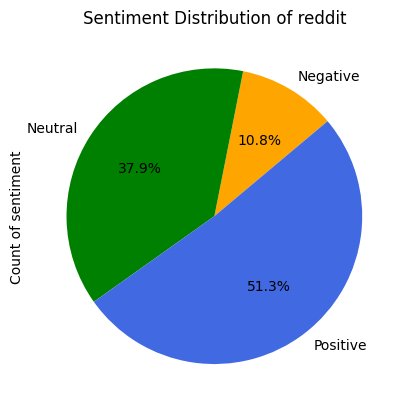

In [14]:
display(reddit.groupby("sentiment").count())
# plt.style.use('seaborn-v0_8-colorblind')
plt.pie(reddit.groupby("sentiment").size(), labels=reddit.groupby("sentiment").size().index, colors=["orange","green","royalblue"], autopct='%1.1f%%', startangle=40)
# reddit.groupby("sentiment").size().plot(kind='pie', autopct='%.2f',color = colour)
plt.title('Sentiment Distribution of reddit')
plt.ylabel('Count of sentiment')
#rotate x-axis labels
plt.xticks(rotation=45)

In [15]:
topic_dict=dict()
for col in reddit.columns[2::]:
    for i in reddit[col]:
        if i not in topic_dict:
            topic_dict[i]=1
        else:
            topic_dict[i]+=1
topic_dict

{'Politics': 4,
 'Tesla': 15,
 'Social Commentary': 3,
 'Criticism': 10,
 'Personal': 3,
 'Space Exploration': 15,
 'Automotive': 3,
 'Infrastructure': 1,
 'Opinion': 4,
 'Philanthropy': 5,
 'Technology': 1,
 'Community': 2,
 'Accountability': 1,
 'Corporate Decisions': 1,
 'Humor': 21,
 'Social Media': 3,
 'Admiration': 12,
 'Pop Culture': 13,
 'Misinformation': 1,
 'Inspiration': 4,
 'History': 1,
 'Design': 2,
 'Speculation': 12,
 'Fan Creation': 1,
 'Naming': 3,
 'Discovery': 2,
 'Finance': 3,
 'Controversy': 4,
 'Gratitude': 2,
 'Observation': 4,
 'Agreement': 3,
 'General Positivity': 1,
 'Rivalry': 2,
 'Nostalgia': 2,
 'Encouragement': 1,
 'Personal Enjoyment': 1,
 'Collective Opinion': 1,
 'Innovation': 6,
 'Ambition': 1,
 'Achievement': 2,
 'Legal Success': 1,
 'Farewell': 1,
 'Awareness': 1,
 'Alignment': 1,
 'Cryptocurrency': 2,
 'Overwhelm': 1,
 'Personal Life': 2,
 'General Observation': 3,
 'Legacy': 1,
 'Surprise': 1,
 'Education Criticism': 1,
 'Support': 4,
 'Complexit

In [16]:
#drop nan values in topic_dict
topic_dict = {k: v for k, v in topic_dict.items() if str(k) != 'nan'}
topic_dict

{'Politics': 4,
 'Tesla': 15,
 'Social Commentary': 3,
 'Criticism': 10,
 'Personal': 3,
 'Space Exploration': 15,
 'Automotive': 3,
 'Infrastructure': 1,
 'Opinion': 4,
 'Philanthropy': 5,
 'Technology': 1,
 'Community': 2,
 'Accountability': 1,
 'Corporate Decisions': 1,
 'Humor': 21,
 'Social Media': 3,
 'Admiration': 12,
 'Pop Culture': 13,
 'Misinformation': 1,
 'Inspiration': 4,
 'History': 1,
 'Design': 2,
 'Speculation': 12,
 'Fan Creation': 1,
 'Naming': 3,
 'Discovery': 2,
 'Finance': 3,
 'Controversy': 4,
 'Gratitude': 2,
 'Observation': 4,
 'Agreement': 3,
 'General Positivity': 1,
 'Rivalry': 2,
 'Nostalgia': 2,
 'Encouragement': 1,
 'Personal Enjoyment': 1,
 'Collective Opinion': 1,
 'Innovation': 6,
 'Ambition': 1,
 'Achievement': 2,
 'Legal Success': 1,
 'Farewell': 1,
 'Awareness': 1,
 'Alignment': 1,
 'Cryptocurrency': 2,
 'Overwhelm': 1,
 'Personal Life': 2,
 'General Observation': 3,
 'Legacy': 1,
 'Surprise': 1,
 'Education Criticism': 1,
 'Support': 4,
 'Complexit

In [17]:
#count the poistve, negative and neutral sentiment percentage for each topic
topic_sentiment_dict = dict()
for topic in topic_dict.keys():
    topic_sentiment_dict[topic] = dict()
    topic_sentiment_dict[topic]['positive'] = 0
    topic_sentiment_dict[topic]['negative'] = 0
    topic_sentiment_dict[topic]['neutral'] = 0
    topic_sentiment_dict[topic]['total'] = 0
    for index, row in reddit.iterrows():
        if topic in row.values:
            topic_sentiment_dict[topic]['total'] += 1
            if row['sentiment'] == 'Positive':
                topic_sentiment_dict[topic]['positive'] += 1
            elif row['sentiment'] == 'Negative':
                topic_sentiment_dict[topic]['negative'] += 1
            else:
                topic_sentiment_dict[topic]['neutral'] += 1
    

In [18]:
topic_sentiment_dict

{'Politics': {'positive': 1, 'negative': 1, 'neutral': 2, 'total': 4},
 'Tesla': {'positive': 14, 'negative': 0, 'neutral': 1, 'total': 15},
 'Social Commentary': {'positive': 0, 'negative': 0, 'neutral': 3, 'total': 3},
 'Criticism': {'positive': 0, 'negative': 10, 'neutral': 0, 'total': 10},
 'Personal': {'positive': 3, 'negative': 0, 'neutral': 0, 'total': 3},
 'Space Exploration': {'positive': 12,
  'negative': 0,
  'neutral': 3,
  'total': 15},
 'Automotive': {'positive': 1, 'negative': 1, 'neutral': 1, 'total': 3},
 'Infrastructure': {'positive': 1, 'negative': 0, 'neutral': 0, 'total': 1},
 'Opinion': {'positive': 0, 'negative': 0, 'neutral': 4, 'total': 4},
 'Philanthropy': {'positive': 5, 'negative': 0, 'neutral': 0, 'total': 5},
 'Technology': {'positive': 0, 'negative': 0, 'neutral': 1, 'total': 1},
 'Community': {'positive': 2, 'negative': 0, 'neutral': 0, 'total': 2},
 'Accountability': {'positive': 1, 'negative': 0, 'neutral': 0, 'total': 1},
 'Corporate Decisions': {'pos

Total number of topic about Elon Musk in Reddit is :71


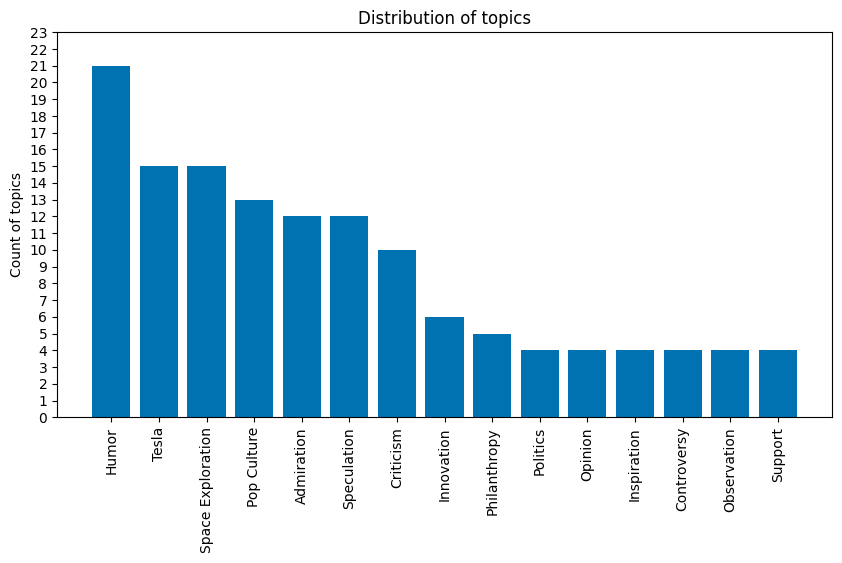

In [19]:
print(f"Total number of topic about Elon Musk in Reddit is :{len(topic_dict)}")
#sort the dictionary by values
topic_dict=dict(sorted(topic_dict.items(), key=lambda x:x[1], reverse=True))
#plot the distribution of topics
i=15
# for i in range (0, len(topic_dict), a):
plt.figure(figsize=(10,5))
plt.style.use('seaborn-v0_8-colorblind')
plt.bar(list(topic_dict.keys())[0:i],list(topic_dict.values())[0:i])
#set the color of the bar base 
plt.title('Distribution of topics')
plt.ylabel('Count of topics')
#set y axis interval to 1
plt.yticks(range(0, max(topic_dict.values())+3, 1))
#rotate x-axis labels
plt.xticks(rotation=90)
plt.show()


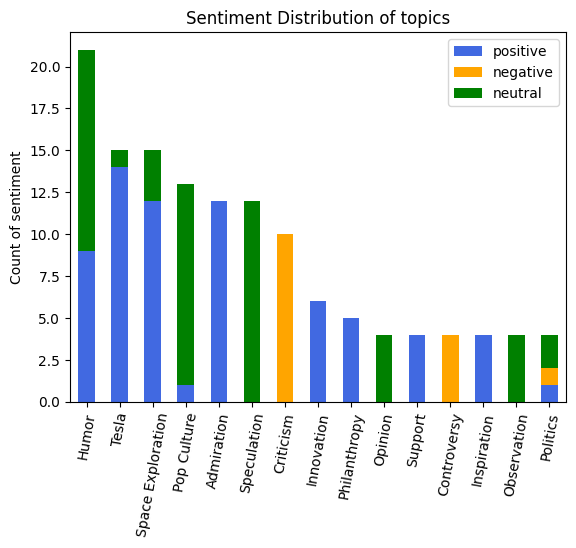

In [20]:
#topic_sentiment_dict to plot the stacked bar chart
topic_sentiment_df = pd.DataFrame(topic_sentiment_dict).T
topic_sentiment_df = topic_sentiment_df.sort_values(by='total', ascending=False)
topic_sentiment_df = topic_sentiment_df.head(15)
#plot the stacked bar chart, positive in royalblue, negative in orange and neutral in green sentiment
plt.style.use('seaborn-v0_8-colorblind')
topic_sentiment_df[['positive','negative','neutral']].plot(kind='bar', stacked=True, color=["royalblue","orange","green"])
plt.title('Sentiment Distribution of topics')
plt.ylabel('Count of sentiment')
plt.xticks(rotation=80)
plt.show()



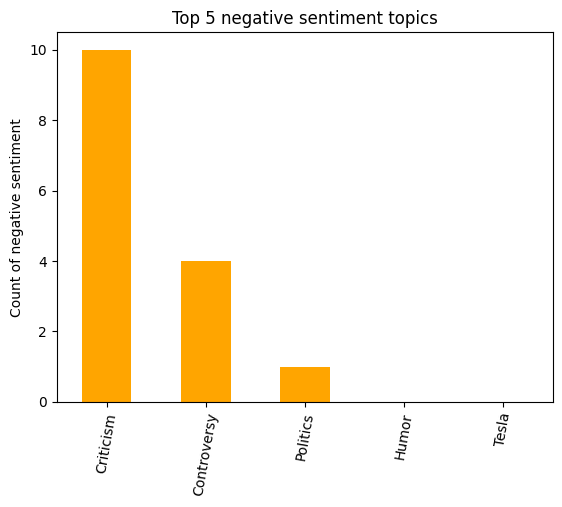

In [21]:
#plot the top 5 negative sentiment topics, set color to orange
topic_sentiment_df = topic_sentiment_df.sort_values(by='negative', ascending=False)
plt.style.use('seaborn-v0_8-colorblind')
topic_sentiment_df['negative'].head(5).plot(kind='bar', color='orange')
plt.title('Top 5 negative sentiment topics')
plt.ylabel('Count of negative sentiment')
plt.xticks(rotation=80)
plt.show()

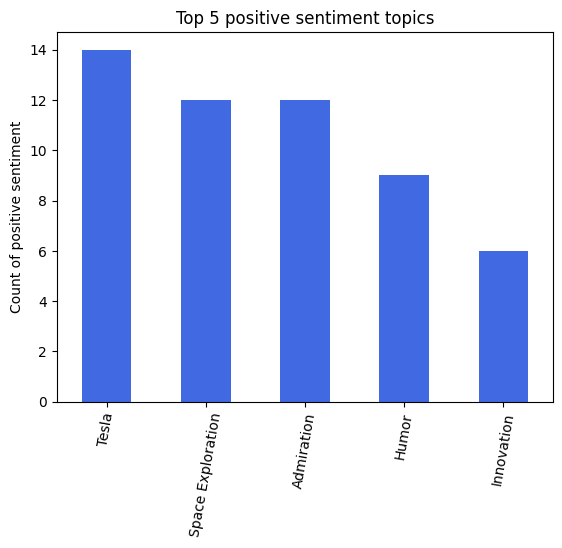

In [22]:
#plot the top 5 poistive sentiment topics, set color to green
topic_sentiment_df = topic_sentiment_df.sort_values(by='positive', ascending=False)
plt.style.use('seaborn-v0_8-colorblind')
topic_sentiment_df['positive'].head(5).plot(kind='bar', color='royalblue')
plt.title('Top 5 positive sentiment topics')
plt.ylabel('Count of positive sentiment')
plt.xticks(rotation=80)
plt.show()


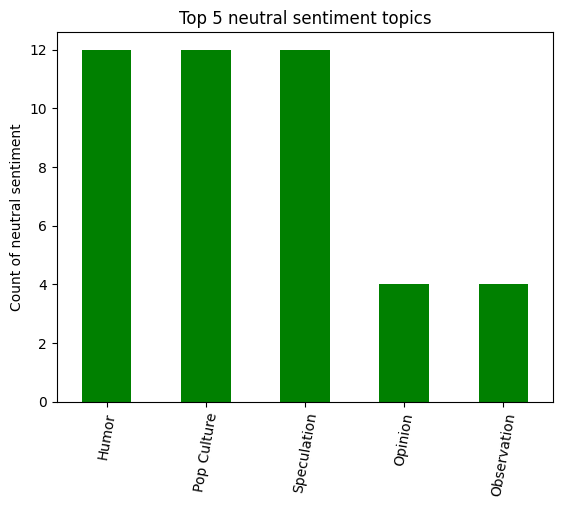

In [23]:
#plot the top 5 netural sentiment topics, set color to blue
topic_sentiment_df = topic_sentiment_df.sort_values(by='neutral', ascending=False)
plt.style.use('seaborn-v0_8-colorblind')
topic_sentiment_df['neutral'].head(5).plot(kind='bar', color='green')
plt.title('Top 5 neutral sentiment topics')
plt.ylabel('Count of neutral sentiment')
plt.xticks(rotation=80)
plt.show()

# news

In [2]:
news = pd.read_csv('news.csv',encoding='latin1')
news['sentiment'] = news['sentiment'].replace('Neutral?', 'Neutral')
news['sentiment'] = news['sentiment'].replace('Negative?', 'Negative')
news

,title,source,publishedAt,sentiment,Topic,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Elon Musk asks court to block OpenAI from conv...,CNBC,2024-12-01T01:27:00.000Z,sentiment,Elon Musk,NaN,NaN,NaN,NaN
1,Elon Musk?s xAI goes after OpenAI,The Economist,2024-11-27T19:17:33.000Z,Neutral,Artificial Intelligence,NaN,NaN,NaN,NaN
2,Elon Musk publicized the names of government e...,CNN,2024-11-27T16:38:00.000Z,Negative,Elon Musk,NaN,NaN,NaN,NaN
3,Trump ally Elon Musk calls to ?delete??US con...,Al Jazeera English,2024-11-28T00:15:39.000Z,Negative,Elon Musk,NaN,NaN,NaN,NaN
4,Elon Musk and Trump dance to 'Y-M-C-A' at Than...,CNN,2024-11-29T17:24:18.000Z,Neutral,Entertainment,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
121,"Here are the remaining Trump Cabinet picks, ot...",New York Post,2024-11-28T17:12:00.000Z,Neutral,Legal Technology,NaN,NaN,NaN,NaN
122,Elon Musk Joins Donald Trump's Family for Than...,Newsweek,2024-11-29T09:31:59.000Z,Negative,Elon Musk,NaN,NaN,NaN,NaN
123,Alex Jones Supporters Urge Elon Musk to Buy In...,LatinTimes,2024-09-25T07:00:00.000Z,Neutral,Donald Trump,NaN,NaN,NaN,NaN
124,Darryl Cunningham asks: who?s afraid of Elon ...,Comics Beat,2024-11-13T08:00:00.000Z,Positive,Elon Musk,NaN,NaN,NaN,NaN


In [4]:
#group by sentiment
display(news.source.value_counts())

source
New York Post         9
CNN                   6
Newsweek              6
The Times of India    3
CTV News              3
                     ..
Check Your Fact       1
AS USA                1
Baltimore Sun         1
24/7 Wall St.         1
Comics Beat           1
Name: count, Length: 84, dtype: int64

,title,source,publishedAt,Topic,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
sentiment,,,,,,,,
Negative,34,34,34,34,2,2,2,1
Neutral,50,50,50,50,3,3,0,0
Positive,42,42,42,42,0,0,0,0


Text(0, 0.5, 'Count of sentiment')

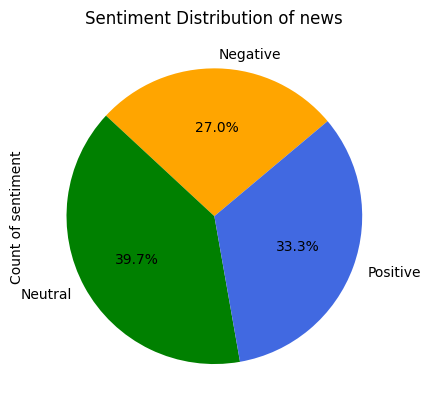

In [206]:
display(news.groupby("sentiment").count())
plt.style.use('seaborn-v0_8-colorblind')
plt.pie(news.groupby("sentiment").size(), labels=news.groupby("sentiment").size().index, colors=["orange","green","royalblue"], autopct='%1.1f%%', startangle=40)
# news.groupby("sentiment").size().plot(kind='pie', autopct='%.2f')
plt.title('Sentiment Distribution of news')
plt.ylabel('Count of sentiment')

In [207]:
news

,title,source,publishedAt,sentiment,Topic,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Elon Musk asks court to block OpenAI from conv...,CNBC,2024-12-01T01:27:00.000Z,Neutral,Elon Musk,NaN,NaN,NaN,NaN
1,Elon Musk?s xAI goes after OpenAI,The Economist,2024-11-27T19:17:33.000Z,Neutral,Artificial Intelligence,NaN,NaN,NaN,NaN
2,Elon Musk publicized the names of government e...,CNN,2024-11-27T16:38:00.000Z,Negative,Elon Musk,NaN,NaN,NaN,NaN
3,Trump ally Elon Musk calls to ?delete??US con...,Al Jazeera English,2024-11-28T00:15:39.000Z,Negative,Elon Musk,NaN,NaN,NaN,NaN
4,Elon Musk and Trump dance to 'Y-M-C-A' at Than...,CNN,2024-11-29T17:24:18.000Z,Neutral,Entertainment,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
121,"Here are the remaining Trump Cabinet picks, ot...",New York Post,2024-11-28T17:12:00.000Z,Neutral,Legal Technology,NaN,NaN,NaN,NaN
122,Elon Musk Joins Donald Trump's Family for Than...,Newsweek,2024-11-29T09:31:59.000Z,Negative,Elon Musk,NaN,NaN,NaN,NaN
123,Alex Jones Supporters Urge Elon Musk to Buy In...,LatinTimes,2024-09-25T07:00:00.000Z,Neutral,Donald Trump,NaN,NaN,NaN,NaN
124,Darryl Cunningham asks: who?s afraid of Elon ...,Comics Beat,2024-11-13T08:00:00.000Z,Positive,Elon Musk,NaN,NaN,NaN,NaN


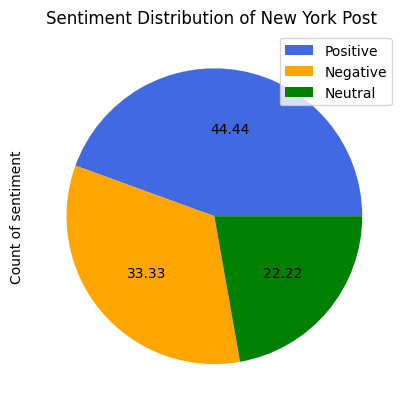

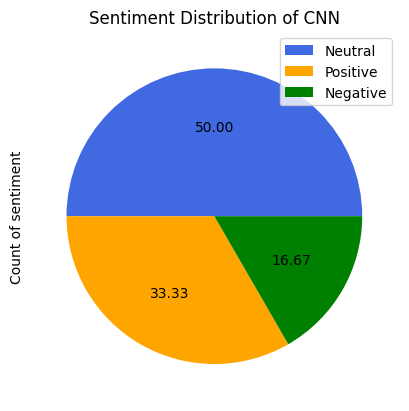

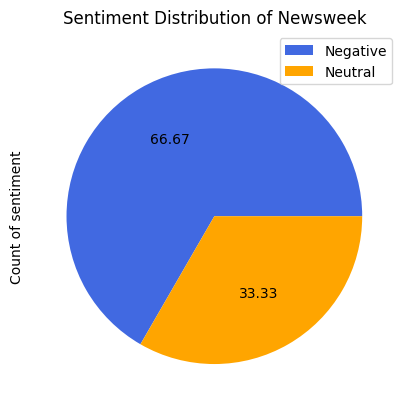

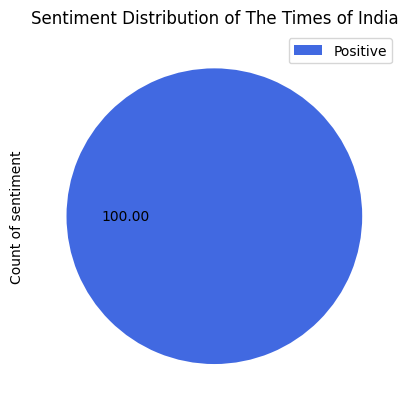

Index(['New York Post ', 'CNN', 'Newsweek', 'The Times of India'], dtype='object', name='source')

In [213]:
# #plot top 10 news source
# plt.style.use('seaborn-v0_8-colorblind')
# news['source'].value_counts().head(10).plot(kind='bar')
# plt.title('Top 10 news sources')
# plt.ylabel('Count of news')
# plt.xticks(rotation=45)
# plt.show()

for source in news['source'].value_counts().head(4).index:
    plt.pie(news[news['source'] == source]['sentiment'].value_counts(), autopct='%.2f',colors=["royalblue","orange","green"])
    #add label
    plt.legend(news[news['source'] == source]['sentiment'].value_counts().index)
    plt.title(f'Sentiment Distribution of {source}')
    plt.ylabel('Count of sentiment')
    plt.show()

# source = "CNN"
# news[news['source'] == source]['sentiment'].value_counts().plot(kind='pie', autopct='%.2f')
# plt.title(f'Sentiment Distribution of {source}')
# plt.ylabel('Count of sentiment')
# plt.show()
news['source'].value_counts().head(4).index

In [115]:
topic_dict=dict()
for col in news.columns[4::]:
    for i in news[col]:
        if i not in topic_dict:
            topic_dict[i]=1
        else:
            topic_dict[i]+=1
topic_dict = {k: v for k, v in topic_dict.items() if str(k) != 'nan'}
topic_dict

{'Elon Musk': 87,
 'Artificial Intelligence': 1,
 'Entertainment': 1,
 'Tesla': 6,
 'Privacy': 1,
 'Russia': 1,
 'Donald Trump': 16,
 'SpaceX': 1,
 'US Corporations': 1,
 'Stock Market': 1,
 'Space Exploration': 1,
 'OpenAI': 1,
 'NASA': 1,
 'Jeff Bezos': 1,
 'Joe Rogan': 1,
 'Walmart': 1,
 'Sophie Trudeau': 1,
 'Binance': 1,
 'Ron Paul': 1,
 'Legal Technology': 1,
 ' Elon Musk': 2,
 ' Politics': 1,
 ' Media': 1,
 ' Cybertruck': 1,
 ' Vivek Ramaswamy': 1,
 ' Legal Issues.': 1,
 ' Donald Trump': 1,
 ' Automotive Design': 1,
 ' Telecommuting': 1,
 ' DOGE': 1,
 ' Government Policy': 1,
 ' Memes': 1}

In [116]:
#count the poistve, negative and neutral sentiment percentage for each topic
topic_sentiment_dict = dict()
for topic in topic_dict.keys():
    topic_sentiment_dict[topic] = dict()
    topic_sentiment_dict[topic]['positive'] = 0
    topic_sentiment_dict[topic]['negative'] = 0
    topic_sentiment_dict[topic]['neutral'] = 0
    topic_sentiment_dict[topic]['total'] = 0
    for index, row in news.iterrows():
        if topic in row.values:
            topic_sentiment_dict[topic]['total'] += 1
            if row['sentiment'].lower() == 'positive':
                topic_sentiment_dict[topic]['positive'] += 1
            elif row['sentiment'].lower() == 'negative':
                topic_sentiment_dict[topic]['negative'] += 1
            else:
                topic_sentiment_dict[topic]['neutral'] += 1

topic_sentiment_dict
    

{'Elon Musk': {'positive': 32, 'negative': 25, 'neutral': 30, 'total': 87},
 'Artificial Intelligence': {'positive': 0,
  'negative': 0,
  'neutral': 1,
  'total': 1},
 'Entertainment': {'positive': 0, 'negative': 0, 'neutral': 1, 'total': 1},
 'Tesla': {'positive': 0, 'negative': 4, 'neutral': 2, 'total': 6},
 'Privacy': {'positive': 0, 'negative': 0, 'neutral': 1, 'total': 1},
 'Russia': {'positive': 0, 'negative': 1, 'neutral': 0, 'total': 1},
 'Donald Trump': {'positive': 6, 'negative': 3, 'neutral': 7, 'total': 16},
 'SpaceX': {'positive': 1, 'negative': 0, 'neutral': 0, 'total': 1},
 'US Corporations': {'positive': 0, 'negative': 0, 'neutral': 1, 'total': 1},
 'Stock Market': {'positive': 1, 'negative': 0, 'neutral': 0, 'total': 1},
 'Space Exploration': {'positive': 0, 'negative': 0, 'neutral': 1, 'total': 1},
 'OpenAI': {'positive': 0, 'negative': 1, 'neutral': 0, 'total': 1},
 'NASA': {'positive': 0, 'negative': 0, 'neutral': 1, 'total': 1},
 'Jeff Bezos': {'positive': 0, 'neg

Total number of topic about Elon Musk in News is :32


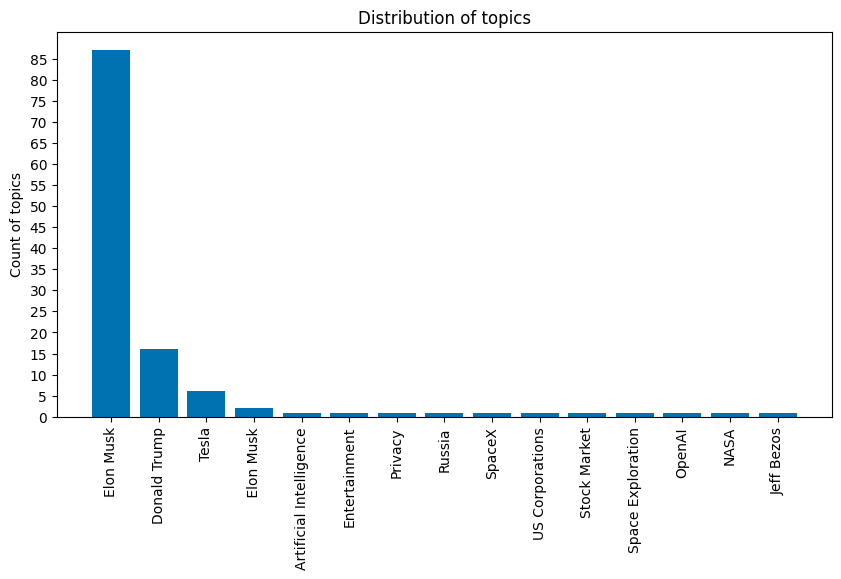

In [117]:
print(f"Total number of topic about Elon Musk in News is :{len(topic_dict)}")
#sort the dictionary by values
topic_dict=dict(sorted(topic_dict.items(), key=lambda x:x[1], reverse=True))
#plot the distribution of topics
i=15
# for i in range (0, len(topic_dict), a):
plt.figure(figsize=(10,5))
plt.style.use('seaborn-v0_8-colorblind')
plt.bar(list(topic_dict.keys())[0:i],list(topic_dict.values())[0:i])
#set the color of the bar base 
plt.title('Distribution of topics')
plt.ylabel('Count of topics')
#set y axis interval to 1
plt.yticks(range(0, max(topic_dict.values())+3, 5))
#rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x500 with 0 Axes>

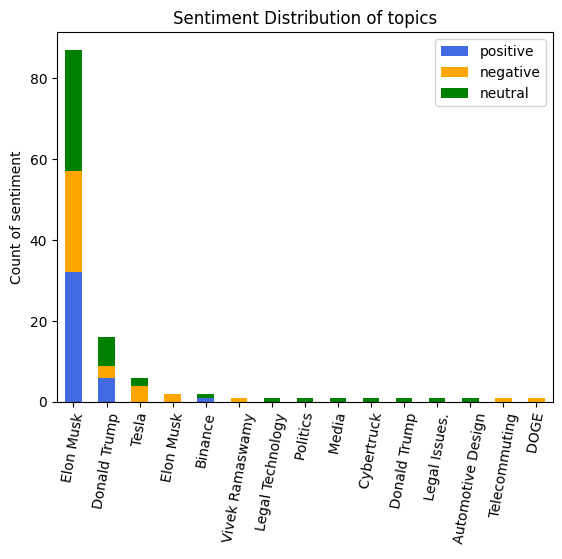

In [217]:
#topic_sentiment_dict to plot the stacked bar chart
topic_sentiment_df = pd.DataFrame(topic_sentiment_dict).T
topic_sentiment_df = topic_sentiment_df.sort_values(by='total', ascending=False)
topic_sentiment_df = topic_sentiment_df.head(15)
#plot the stacked bar chart
plt.style.use('seaborn-v0_8-colorblind')
plt.figure(figsize=(10,5))

topic_sentiment_df[['positive', 'negative', 'neutral']].plot(kind='bar', stacked=True,color=["royalblue","orange","green"])
plt.title('Sentiment Distribution of topics')
plt.ylabel('Count of sentiment')
plt.xticks(rotation=80)
plt.show()



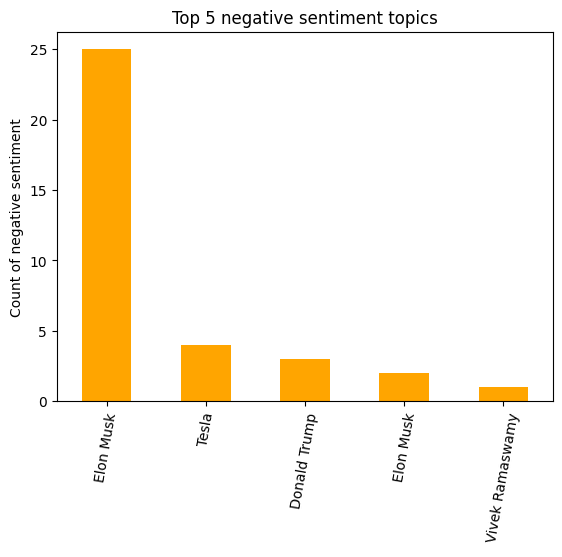

In [119]:
#plot the top 5 negative sentiment topics, set color to orange
topic_sentiment_df = topic_sentiment_df.sort_values(by='negative', ascending=False)
plt.style.use('seaborn-v0_8-colorblind')
topic_sentiment_df['negative'].head(5).plot(kind='bar', color='orange')
plt.title('Top 5 negative sentiment topics')
plt.ylabel('Count of negative sentiment')
plt.xticks(rotation=80)
plt.show()

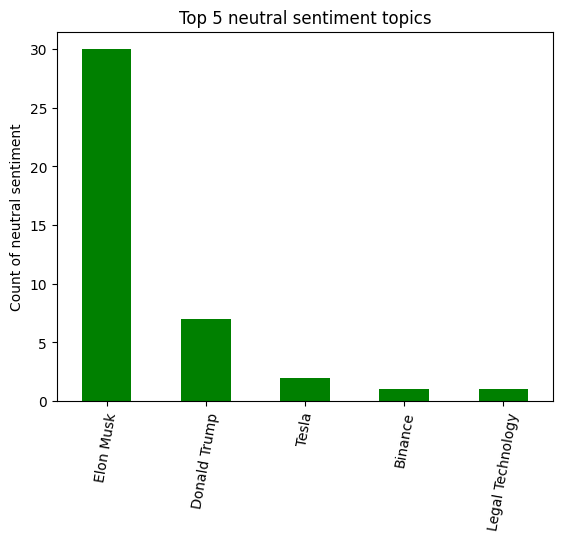

In [120]:
#plot the top 5 neutral sentiment topics, set color to orange
topic_sentiment_df = topic_sentiment_df.sort_values(by='neutral', ascending=False)
plt.style.use('seaborn-v0_8-colorblind')
topic_sentiment_df['neutral'].head(5).plot(kind='bar',color='green')
plt.title('Top 5 neutral sentiment topics')
plt.ylabel('Count of neutral sentiment')
plt.xticks(rotation=80)
plt.show()

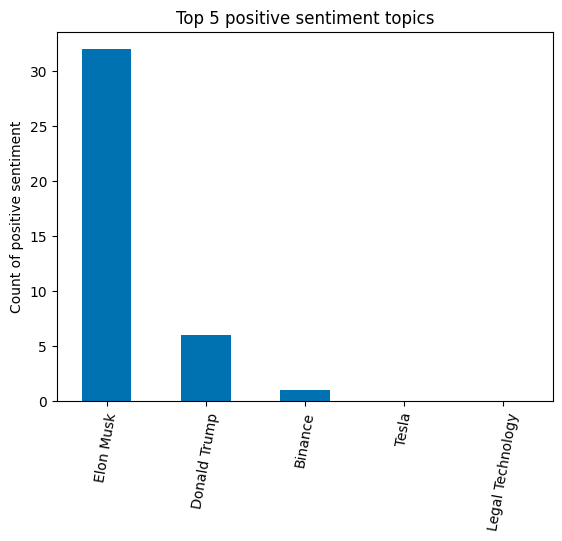

In [121]:
#plot the top 5 negative sentiment topics, set color to orange
topic_sentiment_df = topic_sentiment_df.sort_values(by='positive', ascending=False)
plt.style.use('seaborn-v0_8-colorblind')
topic_sentiment_df['positive'].head(5).plot(kind='bar')
plt.title('Top 5 positive sentiment topics')
plt.ylabel('Count of positive sentiment')
plt.xticks(rotation=80)
plt.show()

# Total

In [133]:

#news[['title','sentiment']] join reddit[['title','sentiment']]
total =pd.concat([news[['title','sentiment']],reddit[['title','sentiment']]])



,title
sentiment,
Negative,55
Neutral,124
Positive,142


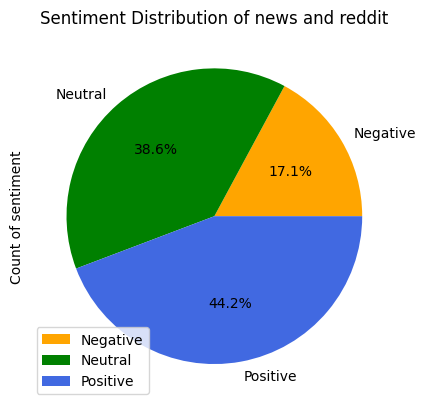

In [218]:
total.groupby('sentiment').count().plot(kind="pie",y='title',autopct='%1.1f%%',colors=["orange","green","royalblue"])
plt.title('Sentiment Distribution of news and reddit')
plt.ylabel('Count of sentiment')
plt.show()


In [160]:
    # Convert 'publishedAt' to datetime format and extract necessary data
news['publishedAt'] = pd.to_datetime(news['publishedAt'], errors='coerce')

# Drop rows with invalid or missing dates
news = news.dropna(subset=['publishedAt'])

# Extract only the necessary columns
news = news[['publishedAt', 'sentiment']]

# Create biweekly intervals and calculate percentage of positive sentiment
news['biweekly_period'] = news['publishedAt'].dt.to_period('2W')

# Calculate percentage of positive sentiment
positive_sentiment_percentage = (
    news[news['sentiment'] == 'Positive']
    .groupby('biweekly_period')
    .size()
    / news.groupby('biweekly_period').size() * 100
).reset_index(name='Positive Sentiment (%)')
negative_sentiment_percentage = (
    news[news['sentiment'] == 'Negative']
    .groupby('biweekly_period')
    .size()
    / news.groupby('biweekly_period').size() * 100
).reset_index(name='Negative Sentiment (%)')
neutral_sentiment_percentage = (
    news[news['sentiment'] == 'Neutral']
    .groupby('biweekly_period')
    .size()
    / news.groupby('biweekly_period').size() * 100
).reset_index(name='Neutral Sentiment (%)')


C:\Users\TobyC\AppData\Local\Temp\ipykernel_16368\1767940864.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  news['biweekly_period'] = news['publishedAt'].dt.to_period('2W')


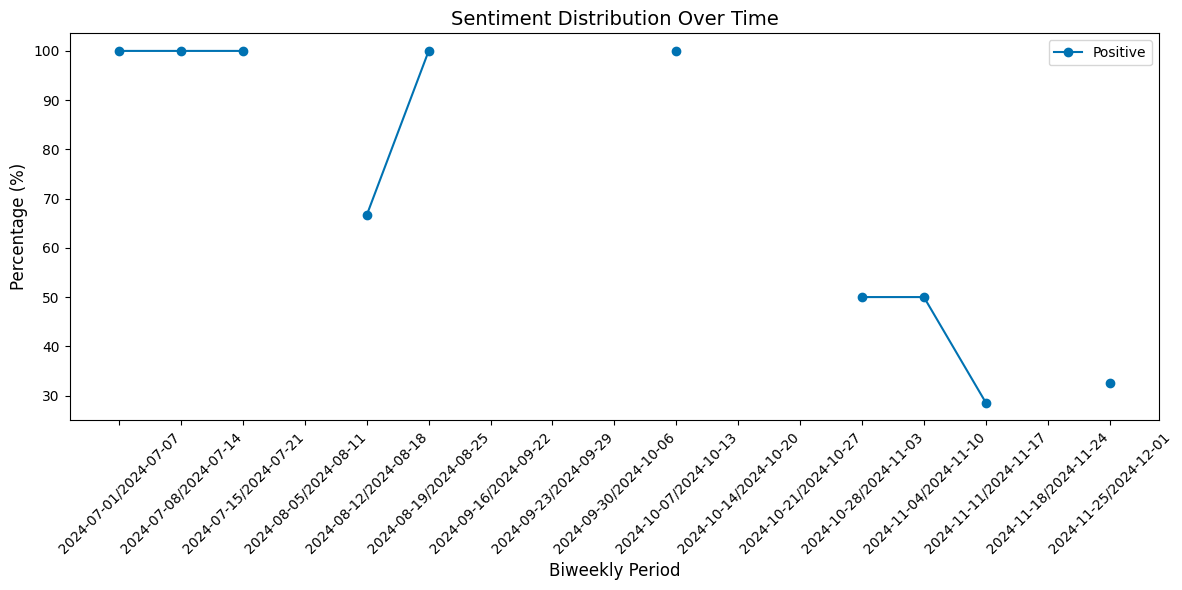

In [164]:
plt.figure(figsize=(12, 6))
plt.plot(
    positive_sentiment_percentage['biweekly_period'].astype(str),
    positive_sentiment_percentage['Positive Sentiment (%)'],
    label='Positive',
    marker='o',
)
# plt.plot(
#     negative_sentiment_percentage['biweekly_period'].astype(str),
#     negative_sentiment_percentage['Negative Sentiment (%)'],
#     label='Negative',
#     marker='o',
# )
# plt.plot(
#     neutral_sentiment_percentage['biweekly_period'].astype(str),
#     neutral_sentiment_percentage['Neutral Sentiment (%)'],
#     label='Neutral',
#     marker='o',
# )

# Customizing the plot
plt.title('Sentiment Distribution Over Time', fontsize=14)
plt.xlabel('Biweekly Period', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
create a flow char